# RECOMMENDATION SYSTEM 



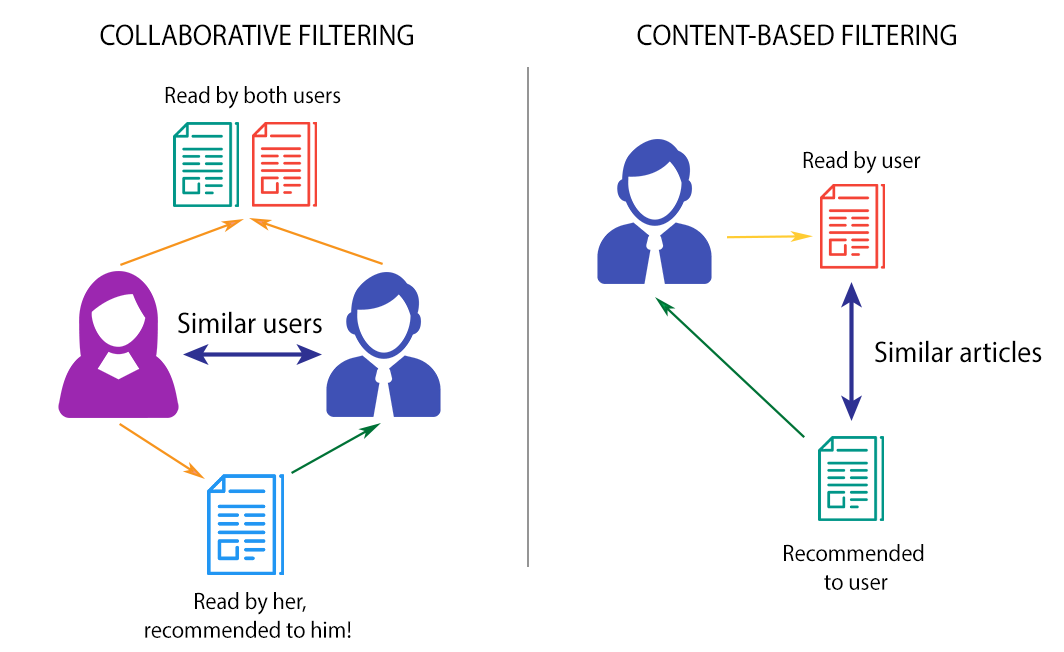

# 1.Import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline

# 2 Load the data

In [4]:
df = pd.read_csv('Movie.csv')
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


# 3 EDA

In [ ]:
#Checking unique users and movies

In [9]:
df['userId'].nunique()

4081

In [7]:
df['movie'].nunique()

10

# 4 Data Visualization

In [ ]:
#Countplot

<AxesSubplot:xlabel='count', ylabel='movie'>

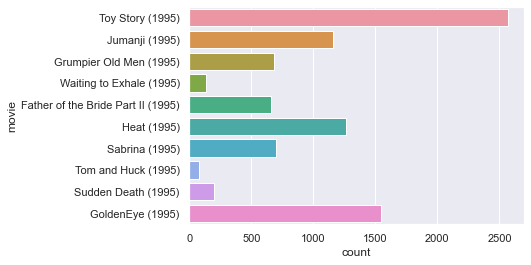

In [12]:
sns.countplot(y = df['movie'])

In [14]:
df['movie'].value_counts()

Toy Story (1995)                      2569
GoldenEye (1995)                      1548
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Grumpier Old Men (1995)                685
Father of the Bride Part II (1995)     657
Sudden Death (1995)                    202
Waiting to Exhale (1995)               138
Tom and Huck (1995)                     78
Name: movie, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

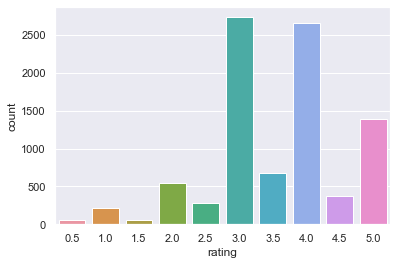

In [15]:
sns.countplot(x = df['rating'])

# 5 Model building

In [ ]:
#User to user based data

In [10]:
df.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [16]:
# User to User Collabrative filtering
pivot = pd.pivot(data=df, index = 'userId',columns='movie', values='rating')# Pivot(Row,Column,Values)

In [17]:
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [18]:
pivot.fillna(0,inplace=True)#Replace all NaN with 0

In [19]:
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [21]:
pivot.isna().sum()

movie
Father of the Bride Part II (1995)    0
GoldenEye (1995)                      0
Grumpier Old Men (1995)               0
Heat (1995)                           0
Jumanji (1995)                        0
Sabrina (1995)                        0
Sudden Death (1995)                   0
Tom and Huck (1995)                   0
Toy Story (1995)                      0
Waiting to Exhale (1995)              0
dtype: int64

In [ ]:
#Calculate the distances and similarity

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
cosine_similarity(pivot)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [19]:
pd.DataFrame(cosine_similarity(pivot))

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [ ]:
df.head(3)

In [25]:
sim = cosine_similarity(pivot) 
sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [26]:
np.fill_diagonal(sim,0)

In [22]:
sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 0.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 0.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 0.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        0.        ]])

In [24]:
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [23]:
pd.DataFrame(sim)#0 -50% Less Recommended 50-100% Highly Recommended


,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [26]:
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [27]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [29]:
df['userId'].unique()

array([   3,    6,    8, ..., 7080, 7087, 7105], dtype=int64)

In [30]:
similarity.index = df['userId'].unique()
similarity.columns = df['userId'].unique()

In [31]:
similarity

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
similarity

3         6         8         10        11        12        13    \
3     0.000000  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.390567  0.707107   
8     0.000000  0.000000  0.000000  0.000000  0.000000  0.650945  0.000000   
10    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
7044  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7070  0.000000  0.000000  0.752577  0.000000  0.000000  0.489886  0.000000   
7080  0.000000  0.458831  0.458831  0.619422  0.000000  0.701884  0.567775   
7087  0.000000  0.000000  1.000000  0.000000  0.000000  0.650945  0.000000   
7105  0.553372  0.000000  0.622543  0.000000  0.553372  0.765455  0.391293   

          14        16        19        22        23        24        31    \
3     0.000000  0.000000  0.000000  0.000000  0.514496  0.000000  0.000000   
6     0.615457  0.000000  0.000000  0.437595  0.000000  0.000000  0.000000   
8     0.492366  1.000000  0.874157  0.583460  0.685994  0.789352  0.000000   
10    0.615457  0.000000  0.388514  0.262557  0.411597  0.000000  0.800000   
11    0.000000  0.000000  0.000000  0.000000  0.514496  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
7044  0.000000  0.000000  0.000000  0.291730  0.000000  0.000000  0.000000   
7070  0.370543  0.752577  0.657870  0.631204  0.516263  0.594048  0.000000   
7080  0.889532  0.458831  0.568212  0.870057  0.491806  0.573451  0.344124   
7087  0.492366  1.000000  0.874157  0.583460  0.685994  0.789352  0.000000   
7105  0.306519  0.622543  0.544201  0.605382  0.711768  0.831143  0.000000   

          34        39        47        53        54        58        59    \
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.419314  0.000000  0.000000  0.000000  0.000000   
8     0.707107  0.000000  0.524142  0.000000  0.514496  1.000000  0.544331   
10    0.424264  0.600000  0.314485  0.600000  0.514496  0.000000  0.653197   
11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
7044  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.272166   
7070  0.532152  0.000000  0.394457  0.000000  0.387198  0.752577  0.588873   
7080  0.729996  0.573539  0.913874  0.573539  0.727873  0.458831  0.842927   
7087  0.707107  0.000000  0.524142  0.000000  0.514496  1.000000  0.544331   
7105  0.440204  0.000000  0.616347  0.000000  0.320296  0.622543  0.564782   

          66        69        80        82        84        90        91    \
3     0.000000  0.600000  0.000000  0.000000  0.000000  0.363803  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.457496   
8     0.000000  0.000000  0.000000  1.000000  0.000000  0.606339  0.000000   
10    0.800000  0.000000  0.000000  0.000000  0.989949  0.485071  0.000000   
11    0.000000  0.600000  0.000000  0.000000  0.000000  0.363803  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
7044  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
7070  0.000000  0.000000  0.658505  0.752577  0.000000  0.456317  0.000000   
7080  0.344124  0.091766  0.000000  0.458831  0.648886  0.612056  0.472305   
7087  0.000000  0.000000  0.000000  1.000000  0.000000  0.606339  0.000000   
7105  0.000000  0.332023  0.000000  0.622543  0.000000  0.780109  0.421942   

          93    96        97        99        105       107       109   \
3     0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.390567   
6     0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
8     0.707107   0.0  0.000000  1.000000

In [ ]:
#Find out similar users

In [32]:
similarity.idxmax()# Highly related Users

3         11
6        168
8         16
10      4047
11         3
        ... 
7044      80
7070    1808
7080     708
7087       8
7105    4110
Length: 4081, dtype: int64

In [33]:
df[df['userId'] == 3]

,userId,movie,rating
0,3,Toy Story (1995),4.0


In [34]:
df[df['userId'] == 11]

,userId,movie,rating
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [36]:
df[(df['userId'] == 3) | (df['userId'] == 11)]         #Pandas filtering

,userId,movie,rating
0,3,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [37]:
df[(df['userId'] == 7087) | (df['userId'] == 8)]

,userId,movie,rating
2,8,Toy Story (1995),4.0
3727,8,Grumpier Old Men (1995),5.0
5205,8,Heat (1995),3.0
7445,8,GoldenEye (1995),4.0
8987,7087,GoldenEye (1995),3.0


In [35]:
df[(df['userId'] == 7080) | (df['userId'] == 708)]

,userId,movie,rating
241,708,Toy Story (1995),3.0
5311,708,Heat (1995),1.0
8985,7080,GoldenEye (1995),5.0
